# MultiOn API Example

Install the latest `multion` python package

In [1]:
!pip install multion -U

In [2]:
import multion
multion.__version__

'0.5.0'

### Initialize Multion Client

In [3]:
from multion.client import MultiOn

### Generate MultiOn API Key and login

Visit [here](https://app.multion.ai/api-keys) to create your MultiOn API Key

In [4]:
multion = MultiOn(api_key="YOUR_MULTION_API_KEY")

### Try the MultiOn Browse API

Give an input language command, starting url and max steps for the agent to take

In [5]:
response = multion.browse(
    cmd="what is the weather today in sf",
    url="https://www.google.com"
)
print(response.message)

The current weather in San Francisco is partly cloudy with a temperature of 56°F (13°C). The humidity is at 51%, and the wind is blowing at 17 mph.



In [6]:
response = multion.browse(
    cmd="Find the latest tweets by Elon Musk?",
    url="https://google.com",
    max_steps=10,
)
print(response.message)

The latest tweet by Elon Musk is: "Tesla Robotaxi unveil on 8/8".



### OPTIONAL: Try the MultiOn Low-level APIs for granular control

`create_session`: Create a new MultiOn Agent with a given starting url

In [7]:
response = multion.sessions.create(url="https://news.ycombinator.com/")
print(response.message)
session_id = response.session_id

New Session Created


`step_session`: Steps the MultiOn Agent once using the specified input command and url 

Agent outputs a status `CONTINUE` if command has not been fulfilled yet, else `DONE`

In [8]:
while response.status == 'CONTINUE':
  response = multion.sessions.step(session_id=session_id, cmd="find the top post on hackernews")
  
if response.status == 'DONE':
    print('task completed')
print(response.message)

task completed
The top post on Hacker News is titled "M 4.8 – 2024 Whitehouse Station, New Jersey Earthquake" with 422 points by the user "theandrewbailey" posted 7 hours ago with 324 comments.



In [9]:
get_screenshot = multion.sessions.screenshot(session_id=session_id)
print("screenshot of session: ", get_screenshot.screenshot)

screenshot of session:  https://multion-client-screenshots.s3.us-east-2.amazonaws.com/ea6aeb0c-4b82-49db-8607-28947590d680_082ad6c2-13bc-4885-b78e-2da7decb8de4_remote_screenshot.png


## Optional: Display the Screenshot

install the required packages to display image

In [10]:
!pip install IPython requests

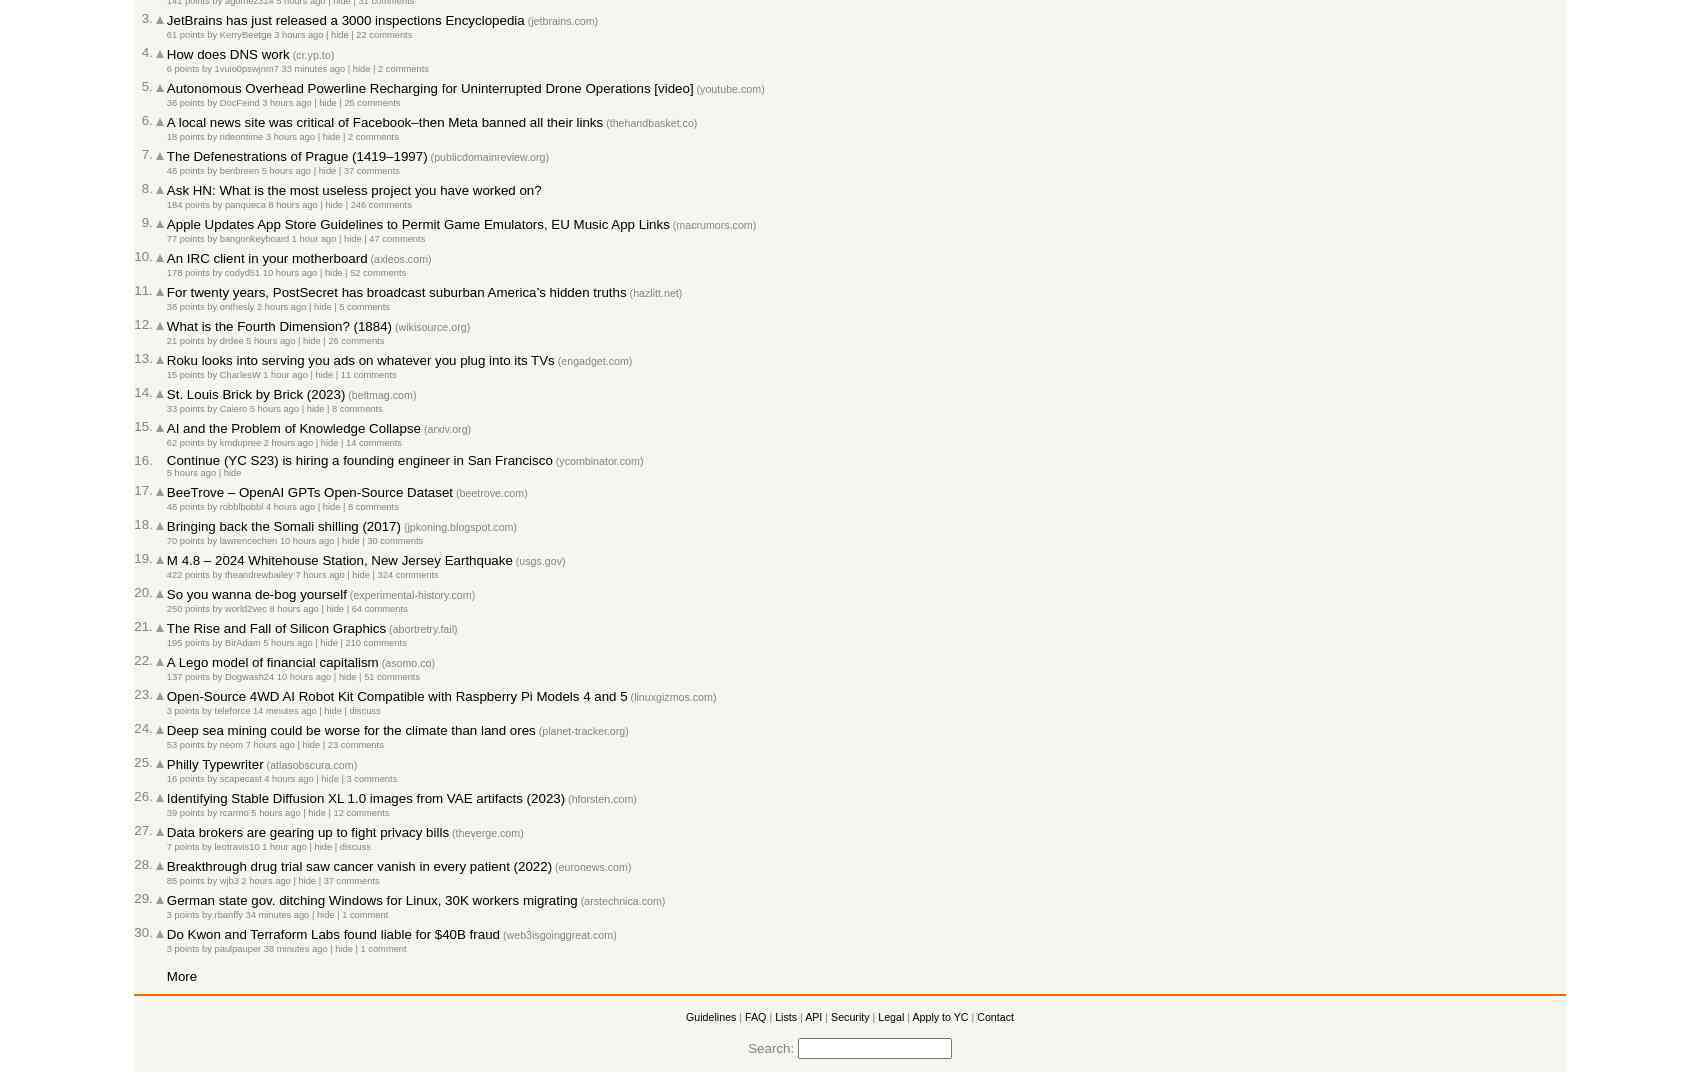

In [11]:
from IPython.display import display, Image
import requests

def display_image_from_url(url):
    response = requests.get(url)
    img = Image(response.content)
    display(img)

display_image_from_url(get_screenshot.screenshot)

`close_session`: Terminate the agent and close the session

In [12]:
close_session_response = multion.sessions.close(session_id=session_id)
print("close_session_response: ", close_session_response)

close_session_response:  status='Session closed' session_id='ea6aeb0c-4b82-49db-8607-28947590d680'
